In [13]:
#import libraries
import os
import pandas as pd
import numpy as np
import math
import scipy
import sklearn
import cv2
import keras
import imageio

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
org_path = os.getcwd()

In [348]:
# GV directories
train_path = '/home/dataset/training_set/'
test_path = '/home/dataset/test_set/'

train_path_cats = '/home/dataset/training_set/cats/'
train_path_dogs = '/home/dataset/training_set/dogs/'

test_path_cats = '/home/dataset/test_set/cats/'
test_path_dogs = '/home/dataset/test_set/dogs/'

In [350]:
# copy of data in my user lab
data_dir = '/home/sa05975666/datasets_/Cats & Dogs'
train_dir=os.path.join(data_dir,'train')
test_dir=os.path.join(data_dir,'test')

In [351]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

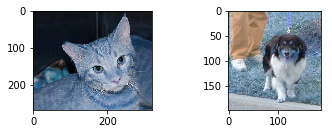

In [304]:
c = cv2.imread('/home/dataset/training_set/cats/cat.14.jpg')  ### read a sample image
d = cv2.imread('/home/dataset/training_set/dogs/dog.2.jpg')  ### read a sample image

plt.subplot(221)
plt.imshow(c) # visualize the orginal image

plt.subplot(222)
plt.imshow(d) # visualize the orginal image

In [354]:
#Loading the Images
import sys

images=[]
train_label = []

for i in range(1,1301):
    image = imageio.imread(train_dogs_dir + '/dog.' + str(i) + '.jpg')
    images.append(image)
    train_label.append(1) #for dog images
    
for i in range(1,1301):
    image = imageio.imread(train_cats_dir + '/cat.' + str(i) + '.jpg')
    images.append(image)
    train_label.append(0) #for cat images

len(images)

2600

In [356]:
for i in range(0,len(images)):
    images[i]=cv2.resize(images[i],(64,64))

In [358]:
#Loading the test Images

test_images=[]
test_label = []

for i in range(1800,2100):
    image = imageio.imread(test_dogs_dir + '/dog.' + str(i) + '.jpg')
    test_images.append(image)
    test_label.append(1) #for dog images
    
for i in range(1500,1800):
    image = imageio.imread(test_cats_dir + '/cat.' + str(i) + '.jpg')
    test_images.append(image)
    test_label.append(0) #for cat images
    
# n = 600
n = len(test_images)
for i in range(0,n):
    test_images[i]=cv2.resize(test_images[i],(64,64))

In [359]:
# converting the data into np arrays
X_train = np.array(images)
y_train = np.array(train_label)

X_test= np.array(test_images)
y_test = np.array(test_label)

In [360]:
print(X_train.shape)
print(X_test.shape)

(2600, 64, 64, 3)
(600, 64, 64, 3)


In [439]:
# Shuffle the data
from sklearn.utils import shuffle
X, y = shuffle(X_train, y_train, random_state = 7)
Xt, yt = shuffle(X_test, y_test, random_state = 9)

# Convolutional Neural Network (Cats vs Dogs)
# Building the Baseline CNN model

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3)))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

#fit the model
model = classifier.fit(X, y, epochs = 5, batch_size = 32, validation_data = (Xt,yt), shuffle = 'batch')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              12846080  
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
__________

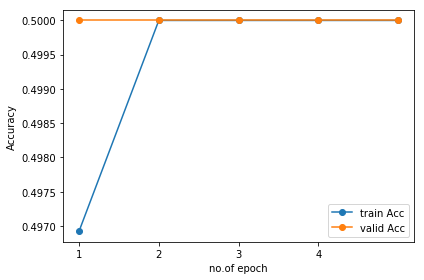

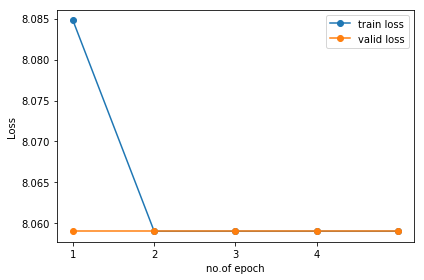

In [380]:
def plotResults(model_name):
    val_loss, val_acc, loss, acc = model_name.history.values()

    plt.figure(figsize = (6,4))
    plt.plot(np.arange(1,len(acc)+1,1), acc, 'o-', label='train Acc')
    plt.plot(np.arange(1,len(val_acc)+1,1), val_acc, 'o-', label='valid Acc')
    plt.xticks(np.arange(1,len(acc)))
    plt.xlabel('no.of epoch')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.legend()
    plt.show()

    plt.figure(figsize = (6,4))
    plt.plot(np.arange(1,len(acc)+1,1), loss, 'o-', label='train loss')
    plt.plot(np.arange(1,len(val_acc)+1,1), val_loss, 'o-', label='valid loss')
    plt.xticks(np.arange(1,len(acc)))
    plt.xlabel('no.of epoch')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.legend()
    plt.show()
    
plotResults(model)

### Visualize the CNN

In [2]:
img_path = "/home/dataset/training_set/cats/cat.14.jpg"

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 256, 256, 3)


In [9]:
## Each Image is a tensor: we are having only one image here at tensor 0
img_tensor[0].shape

(256, 256, 3)

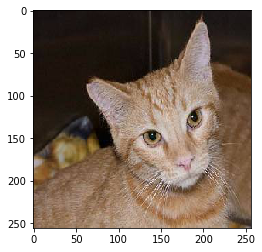

In [10]:
### Displaying the Orginal Image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

cnn = Sequential()
cnn.add(Conv2D(5, # number of filter layers
                (3,3),strides = (2,2), # X,y dimension of kernel (we're going for a 3x3 kernel),
                input_shape = (256,256,3), activation = 'tanh'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(3, (3,3), strides = (2,2),activation = 'relu'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 127, 127, 5)       140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 3)         138       
Total params: 278
Trainable params: 278
Non-trainable params: 0
_________________________________________________________________


In [20]:
cnn.input

<tf.Tensor 'conv2d_1_input:0' shape=(?, 256, 256, 3) dtype=float32>

In [18]:
cnn.layers

In [19]:
cnn.layers[0].output

<tf.Tensor 'conv2d_1/Tanh:0' shape=(?, 127, 127, 5) dtype=float32>

In [15]:
from keras import models
layer_outputs = [layer.output for layer in cnn.layers[:8]] 
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [24]:
activation_of_first_layer = activations[0]
print(activation_of_first_layer.shape)  # It is 127 x 127 feature map with depth 5 (as filters are 5)

(1, 127, 127, 5)


In [26]:
activation_of_first_layer[0, :, :, 4]  # this is the output of the 4th filter

array([[-0.01942336, -0.01879934, -0.02017341, ..., -0.02869736,
        -0.02977275, -0.02951895],
       [-0.01942336, -0.01879934, -0.02017341, ..., -0.02765956,
        -0.02765956, -0.03092638],
       [-0.01942336, -0.01879934, -0.02017341, ..., -0.02662169,
        -0.02881335, -0.03088114],
       ...,
       [-0.17597374, -0.11037807, -0.13371326, ..., -0.07530488,
        -0.06355481, -0.0525263 ],
       [-0.07808103, -0.14539513, -0.13027485, ..., -0.03163308,
        -0.05896183, -0.05067838],
       [-0.1379451 , -0.13578273, -0.14490275, ..., -0.16295327,
        -0.09489289, -0.05126079]], dtype=float32)

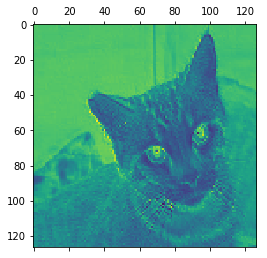

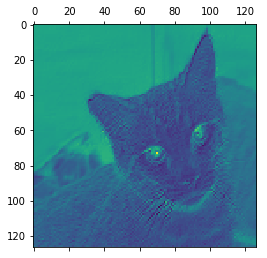

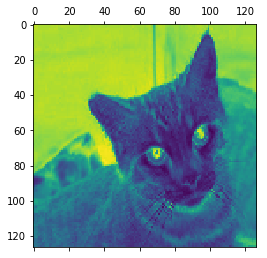

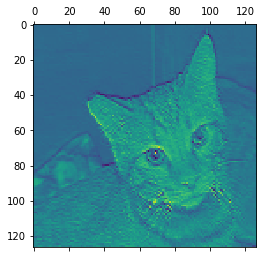

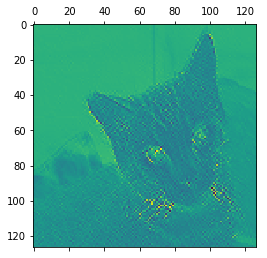

In [42]:
import matplotlib.pyplot as plt
for i in range(0,5):
    plt.figure()
    plt.matshow(activation_of_first_layer[0, :, :, i], cmap='viridis')
    i+=1

In [45]:
model = cnn

In [49]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:, :,col * images_per_row + row]
        channel_image - = channel_image.mean()
        channel_image / = channel_image.std()
        channel_image * = 64
        channel_image + = 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

SyntaxError: invalid syntax (<ipython-input-49-b13a80b740e1>, line 18)

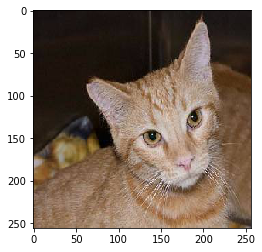

In [459]:
img_path = '/home/dataset/training_set/cats/cat.14.jpg'
cat_img =image.load_img(img_path,target_size=(256,256))
plt.imshow(cat_img)

In [533]:
from keras.preprocessing import image

def visualize_cat(model, cat):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    #catplot = image.array_to_img(conv_cat)
    return conv_cat
    #plt.imshow(catplot)
    
  # with Linear activation

In [535]:
a = visualize_cat(cnn, cat)

(126, 126, 5)


(126, 126, 3)


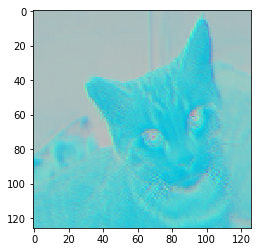

In [521]:
visualize_cat(cnn, cat) # with relu as activation

(126, 126, 3)


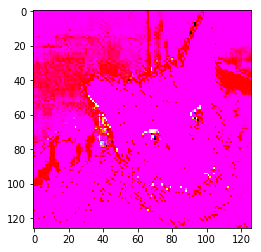

In [523]:
visualize_cat(cnn, cat) # sigmoid as activation

(126, 126, 3)


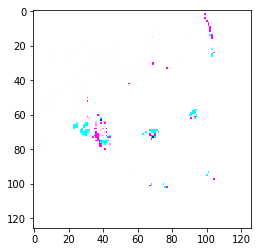

In [525]:
visualize_cat(cnn, cat) # tanh

In [429]:
from keras.applications import vgg16
from keras import backend as K
import skimage.transform
import skimage.filters
import tensorflow as tf
import math

def tensor_summary(tensor):
    """Display shape, min, and max values."""
    print("shape: {}  min: {}  max: {}".format(tensor.shape, tensor.min(), tensor.max()))
    
def normalize(image):
    """Takes a tensor of 3 dimensions (height, width, colors) and normalizes it's values
    to be between 0 and 1 so it's suitable for displaying as an image."""
    image = image.astype(np.float32)
    return (image - image.min()) / (image.max() - image.min() + 1e-5)

def display_images(images, cols=5, interpolation=None, cmap="Greys_r"):
    """
    images can be either:
        - A list of Numpy arrays. Each array represents an image.
        - A list of lists of Numpy arrays. In this case, the images in
          the inner lists are concatentated to make one image.
    """
    rows = math.ceil(len(images) / cols)
    plt.figure(figsize=(15,15))
    i = 1
    for image in images:
        plt.subplot(rows, cols, i)
        plt.axis("off")
        # Is image a list? If so, merge them into one image.
        if type(image) is not np.ndarray:
            image = [normalize(g) for g in image]
            image = np.concatenate(image, axis=1)
        else:
            image = normalize(image)
        plt.imshow(image, cmap=cmap, interpolation=interpolation)
        i += 1
        

def read_layer(model, img, layer_name):
    """Return the activation values for the specifid layer"""
    # Create Keras function to read the output of a specific layer
    get_layer_output = K.function([model.layers[0].input], [model.get_layer(layer_name).output])
    outputs = get_layer_output([img])[0]
    tensor_summary(outputs)
    return outputs[0]
    
def view_layer(model, img, layer_name, cols = 5):
    outputs = read_layer(model, img, layer_name)
    if outputs.shape[2] == 1:
        display_images([outputs[:,:,0]], cols=cols)
    elif outputs.shape[2] <= 10:
        display_images([outputs[:,:,i] for i in range(outputs.shape[2])], cols = cols)
    elif outputs.shape[2] <= 10:
        display_images([outputs[:,:,i] for i in range(10)], cols = cols)

First Conv Layer
shape: (1, 254, 254, 3)  min: -182.54623413085938  max: 430.2384033203125
First Pooling Layer
shape: (1, 127, 127, 3)  min: -168.38516235351562  max: 430.2384033203125
2nd Conv Layer
shape: (1, 125, 125, 5)  min: -224.55789184570312  max: 335.4769287109375


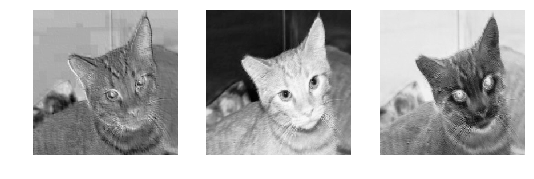

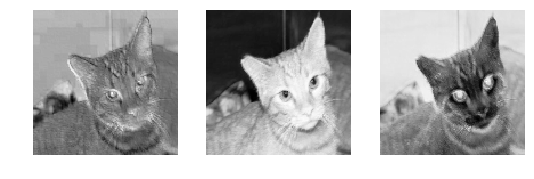

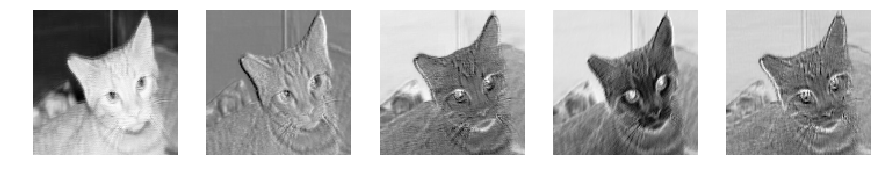

In [404]:
# Convert image to float 
y = cat.astype(np.float32)
# Make it a batch of one. The model expects a batch, not a single image
y = y[np.newaxis,...]

# visulaize the layer
print("First Conv Layer")
view_layer(cnn, y, "conv2d_61")

print("First Pooling Layer")
view_layer(cnn, y, "max_pooling2d_24")

print("2nd Conv Layer")
view_layer(cnn, y, "conv2d_62")

First Conv Layer
shape: (1, 254, 254, 3)  min: -102.40692138671875  max: 594.3822631835938
First Pooling Layer
shape: (1, 127, 127, 3)  min: -76.1589584350586  max: 594.3822631835938
2nd Conv Layer
shape: (1, 125, 125, 5)  min: 0.0  max: 285.9239196777344


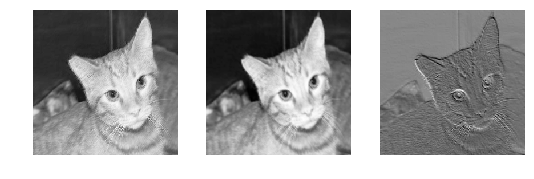

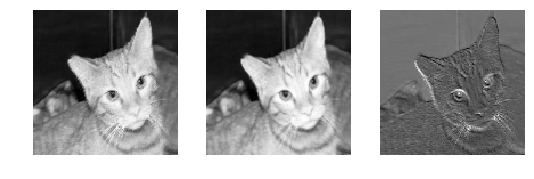

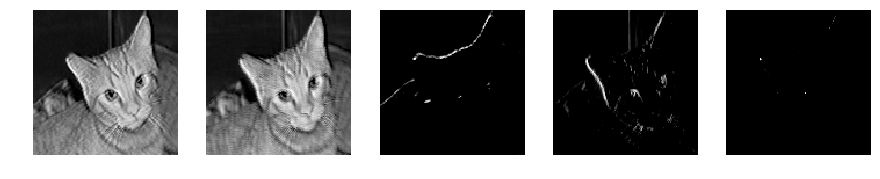

In [409]:
print("First Conv Layer")
view_layer(cnn, y, "conv2d_69")

print("First Pooling Layer")
view_layer(cnn, y, "max_pooling2d_28")

print("2nd Conv Layer with Activation as Relu")
view_layer(cnn, y, "conv2d_70")

First Conv Layer
shape: (1, 252, 252, 3)  min: -120.39862060546875  max: 444.6358947753906
First Pooling Layer
shape: (1, 126, 126, 3)  min: -69.36058044433594  max: 444.6358947753906
2nd Conv Layer with Activation as relu
shape: (1, 122, 122, 5)  min: 0.0  max: 182.23011779785156


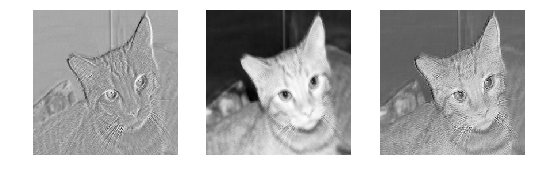

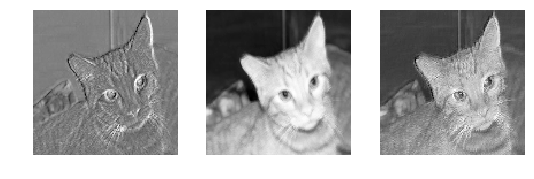

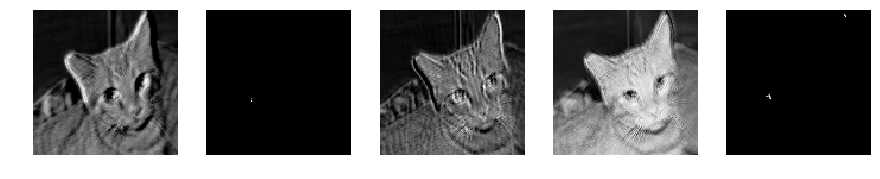

In [434]:
# Convert image to float 
y = cat.astype(np.float32)
# Make it a batch of one. The model expects a batch, not a single image
y = y[np.newaxis,...]

print("First Conv Layer")
view_layer(cnn, y, "conv2d_93")

print("First Pooling Layer")
view_layer(cnn, y, "max_pooling2d_45")

print("2nd Conv Layer with Activation as relu")
view_layer(cnn, y, "conv2d_94")

First Conv Layer
shape: (1, 126, 126, 3)  min: -236.2348175048828  max: 78.62723541259766
First Pooling Layer
shape: (1, 63, 63, 3)  min: -214.8793487548828  max: 78.62723541259766
2nd Conv Layer with Activation as relu
shape: (1, 30, 30, 5)  min: 0.0  max: 168.09390258789062


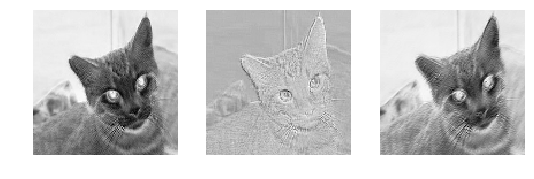

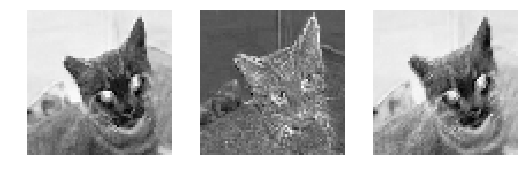

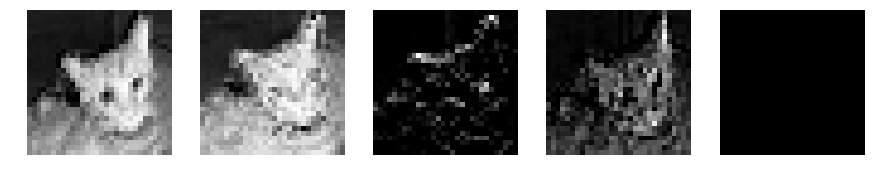

In [438]:
# Convert image to float 
y = cat.astype(np.float32)
# Make it a batch of one. The model expects a batch, not a single image
y = y[np.newaxis,...]

print("First Conv Layer")
view_layer(cnn, y, "conv2d_95")

print("First Pooling Layer")
view_layer(cnn, y, "max_pooling2d_46")

print("2nd Conv Layer with Activation as relu")
view_layer(cnn, y, "conv2d_96")

First Conv Layer
shape: (1, 254, 254, 3)  min: -169.17613220214844  max: 96.13446807861328
First Pooling Layer
shape: (1, 127, 127, 3)  min: -117.08979797363281  max: 96.13446807861328
2nd Conv Layer with Activation as tanh
shape: (1, 125, 125, 5)  min: -1.000000238418579  max: 1.0000001192092896


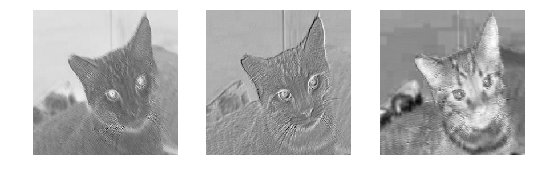

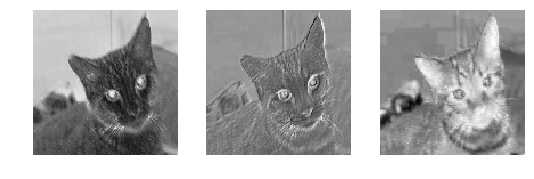

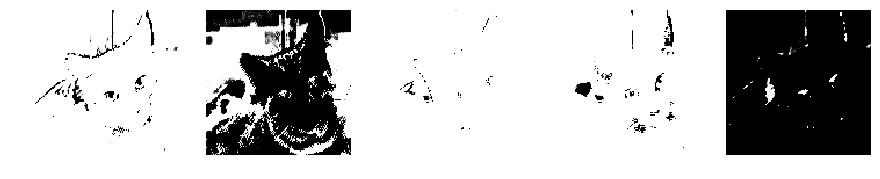

In [432]:
# Convert image to float 
y = cat.astype(np.float32)
# Make it a batch of one. The model expects a batch, not a single image
y = y[np.newaxis,...]

print("First Conv Layer")
view_layer(cnn, y, "conv2d_91")

print("First Pooling Layer")
view_layer(cnn, y, "max_pooling2d_44")

print("2nd Conv Layer with Activation as tanh")
view_layer(cnn, y, "conv2d_92")